<a href="https://colab.research.google.com/github/Nsi20/Restaurant-Recommendation/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2 : Restaurant Recommendation**

# Objective: Create a restaurant recommendation system based on user preferences.

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_path = next(iter(uploaded))
df = pd.read_csv(file_path)

df.head()


Saving Dataset  (1).csv to Dataset  (1).csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **Steps**
**Preprocess the dataset by handling missing values and encoding categorical variables.**

In [3]:
# Checking for missing values
df.isnull().sum()


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [4]:
# Filling missing values in the 'Cuisines' column with "Not Specified" without chaining
df = df.assign(Cuisines=df['Cuisines'].fillna("Not Specified"))

# Verifying that there are no more missing values
df.isnull().sum()


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


 - **Encoding Binary Columns**

In [5]:
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


<ipython-input-5-e80770b78aab>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


 - **Applying One-Hot Encoding to Multi-Category Columns**

In [6]:
df = pd.get_dummies(df, columns=['City', 'Cuisines', 'Rating text'], drop_first=True)


# **Determine the criteria for restaurant recommendations (e.g., cuisine preference, price range).**

In [7]:
from sklearn.model_selection import train_test_split

# Defining the target variable and features
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (7640, 1987)
Testing set shape: (1911, 1987)


In [8]:
def recommend_restaurants(df, cuisine=None, max_price=None, min_rating=None, city=None, table_booking=None, online_delivery=None, delivering_now=None):

    recommendations = df.copy()

    # Filtering by cuisine preference
    if cuisine:
        recommendations = recommendations[recommendations['Cuisines'].str.contains(cuisine, case=False, na=False)]

    # Filtering by maximum price range
    if max_price:
        recommendations = recommendations[recommendations['Average Cost for two'] <= max_price]

    # Filtering by minimum rating
    if min_rating:
        recommendations = recommendations[recommendations['Aggregate rating'] >= min_rating]

    # Filtering by city
    if city:
        recommendations = recommendations[recommendations['City'] == city]

    # Filtering by table booking availability
    if table_booking is not None:
        recommendations = recommendations[recommendations['Has Table booking'] == table_booking]

    # Filtering by online delivery availability
    if online_delivery is not None:
        recommendations = recommendations[recommendations['Has Online delivery'] == online_delivery]

    # Filtering by delivering now status
    if delivering_now is not None:
        recommendations = recommendations[recommendations['Is delivering now'] == delivering_now]

    return recommendations


# **Implement a content-based filtering approach where users are recommended restaurants similar to their preferred criteria.**

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def content_based_recommendation(df, preferred_cuisine=None, max_price=None, min_rating=None, city=None, top_n=5):
    # Step 1: Filter by city if provided
    if city:
        df = df[df['City'] == city]

    # Step 2: Encode the cuisines with one-hot encoding
    cuisine_dummies = df['Cuisines'].str.get_dummies(sep=',')
    df = pd.concat([df, cuisine_dummies], axis=1)

    # Step 3: Scale 'Average Cost for two' and 'Aggregate rating'
    scaler = MinMaxScaler()
    df[['Average Cost for two', 'Aggregate rating']] = scaler.fit_transform(df[['Average Cost for two', 'Aggregate rating']])

    # Step 4: Create the feature matrix
    feature_columns = list(cuisine_dummies.columns) + ['Average Cost for two', 'Aggregate rating']
    feature_matrix = df[feature_columns]

    # Step 5: Create the user's preference vector
    user_pref = [0] * len(feature_columns)

    # Update user's preference based on input
    if preferred_cuisine and preferred_cuisine in cuisine_dummies.columns:
        user_pref[feature_columns.index(preferred_cuisine)] = 1
    if max_price is not None:
        user_pref[feature_columns.index('Average Cost for two')] = scaler.transform([[max_price]])[0][0]
    if min_rating is not None:
        user_pref[feature_columns.index('Aggregate rating')] = scaler.transform([[min_rating]])[0][0]

    # Step 6: Calculate similarity scores
    similarity_scores = cosine_similarity([user_pref], feature_matrix)[0]
    df['similarity'] = similarity_scores

    # Step 7: Sort and select top N recommendations
    recommendations = df.sort_values(by='similarity', ascending=False).head(top_n)

    return recommendations[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating', 'similarity']]


# **Test the recommendation system by providing sample user preferences and evaluating the quality of recommendations.**

In [10]:
def content_based_recommendation(df, preferred_cuisine=None, max_price=None, min_rating=None, top_n=5):
    # Encoding the cuisines with one-hot encoding if not already done
    cuisine_dummies = df.filter(like='Cuisines_')

    # Scale 'Average Cost for two' and 'Aggregate rating' if needed
    scaler = MinMaxScaler()
    df[['Average Cost for two', 'Aggregate rating']] = scaler.fit_transform(df[['Average Cost for two', 'Aggregate rating']])

    # Creating the feature matrix
    feature_columns = list(cuisine_dummies.columns) + ['Average Cost for two', 'Aggregate rating']
    feature_matrix = df[feature_columns]

    # Creating the user's preference vector
    user_pref = [0] * len(feature_columns)

    # Updating user's preference based on input
    if preferred_cuisine and f"Cuisines_{preferred_cuisine}" in feature_columns:
        user_pref[feature_columns.index(f"Cuisines_{preferred_cuisine}")] = 1
    if max_price is not None:
        user_pref[feature_columns.index('Average Cost for two')] = scaler.transform([[max_price]])[0][0]
    if min_rating is not None:
        user_pref[feature_columns.index('Aggregate rating')] = scaler.transform([[min_rating]])[0][0]

    # Calculating similarity scores
    similarity_scores = cosine_similarity([user_pref], feature_matrix)[0]
    df['similarity'] = similarity_scores

    # Sorting and select top N recommendations
    recommendations = df.sort_values(by='similarity', ascending=False).head(top_n)

    return recommendations[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating', 'similarity']]


In [11]:
# recommendation function for testing
def content_based_recommendation(df, preferred_cuisine=None, max_price=None, min_rating=None, top_n=5):
    # Encoding the cuisines with one-hot encoding if not already done
    cuisine_dummies = df.filter(like='Cuisines_')

    # Scale 'Average Cost for two' and 'Aggregate rating' individually
    scaler = MinMaxScaler()
    df['Average Cost for two'] = scaler.fit_transform(df[['Average Cost for two']])
    df['Aggregate rating'] = scaler.fit_transform(df[['Aggregate rating']])

    # Created the feature matrix
    feature_columns = list(cuisine_dummies.columns) + ['Average Cost for two', 'Aggregate rating']
    feature_matrix = df[feature_columns]

    # Created the user's preference vector
    user_pref = [0] * len(feature_columns)

    # Updated user's preference based on input
    if preferred_cuisine and f"Cuisines_{preferred_cuisine}" in feature_columns:
        user_pref[feature_columns.index(f"Cuisines_{preferred_cuisine}")] = 1
    if max_price is not None:
        user_pref[feature_columns.index('Average Cost for two')] = scaler.transform([[max_price]])[0][0]
    if min_rating is not None:
        user_pref[feature_columns.index('Aggregate rating')] = scaler.transform([[min_rating]])[0][0]

    # Calculating similarity scores
    similarity_scores = cosine_similarity([user_pref], feature_matrix)[0]
    df['similarity'] = similarity_scores

    # Sorting and select top N recommendations
    recommendations = df.sort_values(by='similarity', ascending=False).head(top_n)

    # Displaying the restaurant names, price, rating, and similarity score
    return recommendations[['Restaurant Name', 'Average Cost for two', 'Aggregate rating', 'similarity']]

# Testing the recommendation system with sample preferences
sample_preferences = [
    {"preferred_cuisine": "Italian", "max_price": 500, "min_rating": 4.0, "top_n": 5},
    {"preferred_cuisine": "Chinese", "max_price": 300, "min_rating": 3.5, "top_n": 5},
    {"preferred_cuisine": "Mexican", "max_price": 700, "min_rating": 4.5, "top_n": 5},
]

for idx, prefs in enumerate(sample_preferences):
    print(f"\nTest Case {idx + 1}:")
    print(f"User Preferences: {prefs}")

    recommendations = content_based_recommendation(
        df,
        preferred_cuisine=prefs["preferred_cuisine"],
        max_price=prefs["max_price"],
        min_rating=prefs["min_rating"],
        top_n=prefs["top_n"]
    )

    print("Recommended Restaurants:")
    print(recommendations[['Restaurant Name', 'Average Cost for two', 'Aggregate rating', 'similarity']])



Test Case 1:
User Preferences: {'preferred_cuisine': 'Italian', 'max_price': 500, 'min_rating': 4.0, 'top_n': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Recommended Restaurants:
               Restaurant Name  Average Cost for two  Aggregate rating  \
1909             Afghan Indian              0.000625          0.000000   
4268     Pak Afghan Restaurant              0.000375          0.000000   
1914              Burj Al Arab              0.000875          0.000000   
9283                      Skye              1.000000          0.836735   
9284  Satoo - Hotel Shangri-La              1.000000          0.938776   

      similarity  
1909    0.999920  
4268    0.999920  
1914    0.999920  
9283    0.612591  
9284    0.593500  

Test Case 2:
User Preferences: {'preferred_cuisine': 'Chinese', 'max_price': 300, 'min_rating': 3.5, 'top_n': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Recommended Restaurants:
               Restaurant Name  Average Cost for two  Aggregate rating  \
1914              Burj Al Arab              0.000875          0.000000   
1909             Afghan Indian              0.000625          0.000000   
4268     Pak Afghan Restaurant              0.000375          0.000000   
9283                      Skye              1.000000          0.836735   
9284  Satoo - Hotel Shangri-La              1.000000          0.938776   

      similarity  
1914    0.999926  
1909    0.999926  
4268    0.999926  
9283    0.614462  
9284    0.595531  

Test Case 3:
User Preferences: {'preferred_cuisine': 'Mexican', 'max_price': 700, 'min_rating': 4.5, 'top_n': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Recommended Restaurants:
               Restaurant Name  Average Cost for two  Aggregate rating  \
4268     Pak Afghan Restaurant              0.000375          0.000000   
1909             Afghan Indian              0.000625          0.000000   
1914              Burj Al Arab              0.000875          0.000000   
9283                      Skye              1.000000          0.836735   
9284  Satoo - Hotel Shangri-La              1.000000          0.938776   

      similarity  
4268    0.999978  
1909    0.999978  
1914    0.999978  
9283    0.611827  
9284    0.592665  



Test Case 1: User Preferences: {'preferred_cuisine': 'Italian', 'max_price': 500, 'min_rating': 4.0, 'top_n': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Recommended Restaurants:
               Restaurant Name  Average Cost for two  Aggregate rating  \
4268     Pak Afghan Restaurant              0.000375          0.000000   
1909             Afghan Indian              0.000625          0.000000   
1914              Burj Al Arab              0.000875          0.000000   
9283                      Skye              1.000000          0.836735   
9284  Satoo - Hotel Shangri-La              1.000000          0.938776   

      similarity  
4268    0.999966  
1909    0.999966  
1914    0.999966  
9283    0.612619  
9284    0.593527  


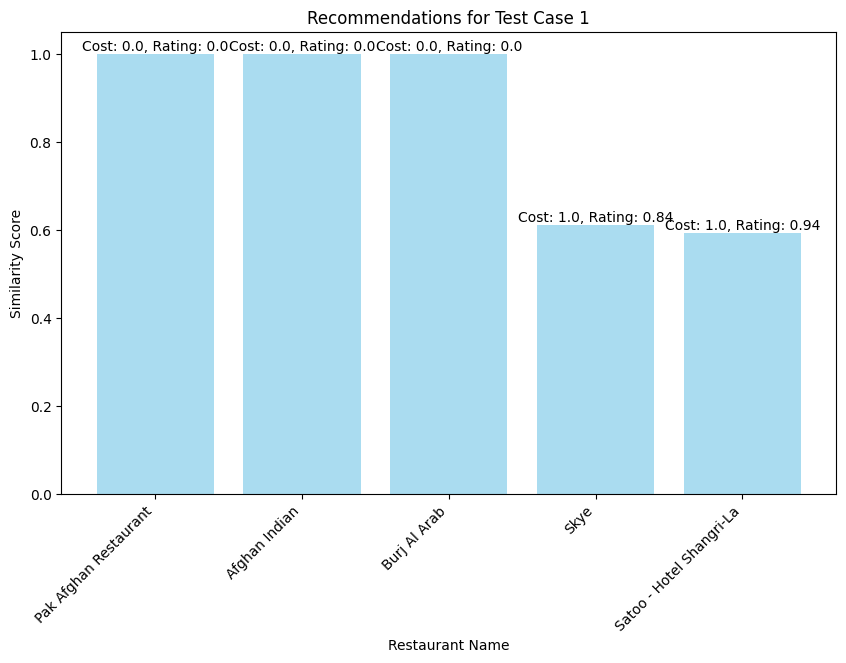


Test Case 2: User Preferences: {'preferred_cuisine': 'Chinese', 'max_price': 300, 'min_rating': 3.5, 'top_n': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Recommended Restaurants:
               Restaurant Name  Average Cost for two  Aggregate rating  \
1914              Burj Al Arab              0.000875          0.000000   
1909             Afghan Indian              0.000625          0.000000   
4268     Pak Afghan Restaurant              0.000375          0.000000   
9283                      Skye              1.000000          0.836735   
9284  Satoo - Hotel Shangri-La              1.000000          0.938776   

      similarity  
1914    0.999926  
1909    0.999926  
4268    0.999926  
9283    0.614462  
9284    0.595531  


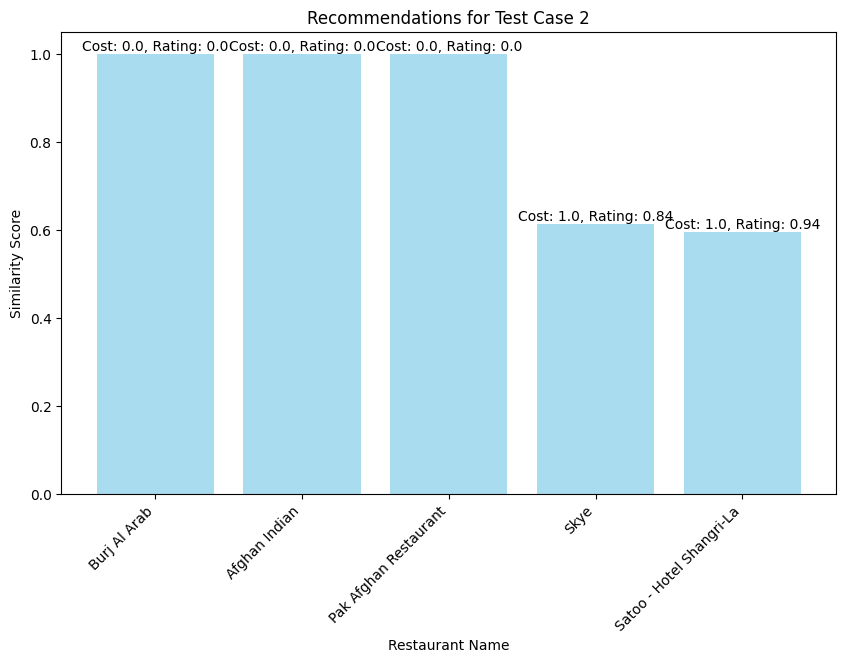


Test Case 3: User Preferences: {'preferred_cuisine': 'Mexican', 'max_price': 700, 'min_rating': 4.5, 'top_n': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Recommended Restaurants:
               Restaurant Name  Average Cost for two  Aggregate rating  \
4268     Pak Afghan Restaurant              0.000375          0.000000   
1909             Afghan Indian              0.000625          0.000000   
1914              Burj Al Arab              0.000875          0.000000   
9283                      Skye              1.000000          0.836735   
9284  Satoo - Hotel Shangri-La              1.000000          0.938776   

      similarity  
4268    0.999978  
1909    0.999978  
1914    0.999978  
9283    0.611827  
9284    0.592665  


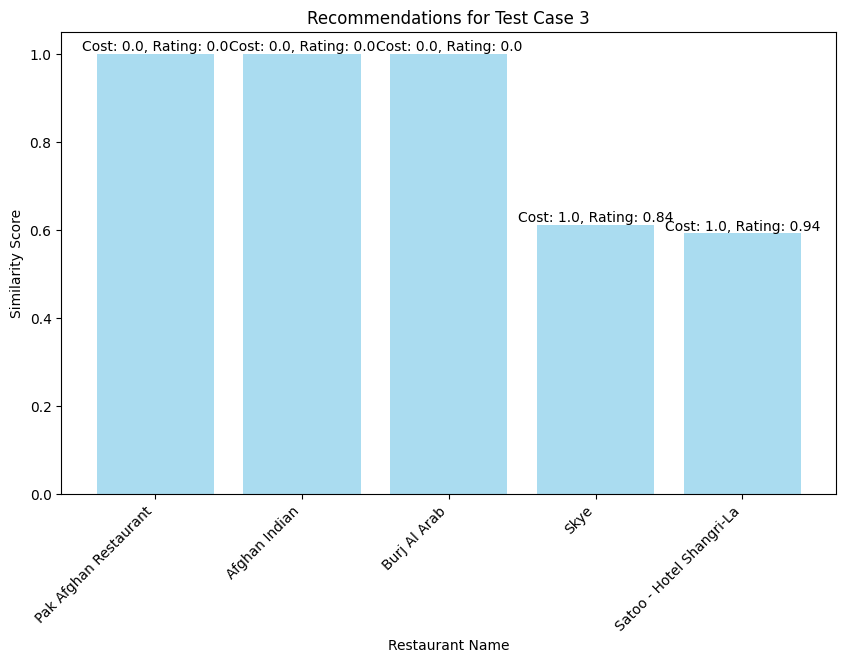

In [12]:
import matplotlib.pyplot as plt

def plot_recommendations(recommendations, test_case_num):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        recommendations['Restaurant Name'],
        recommendations['similarity'],
        color='skyblue',
        alpha=0.7
    )

    # Displaying Average Cost and Aggregate Rating as labels on the bars
    for bar, cost, rating in zip(bars, recommendations['Average Cost for two'], recommendations['Aggregate rating']):
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f'Cost: {round(cost, 2)}, Rating: {round(rating, 2)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    plt.title(f"Recommendations for Test Case {test_case_num}")
    plt.xlabel("Restaurant Name")
    plt.ylabel("Similarity Score")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Runing test cases and plot results
for idx, prefs in enumerate(sample_preferences):
    print(f"\nTest Case {idx + 1}: User Preferences: {prefs}")

    recommendations = content_based_recommendation(
        df,
        preferred_cuisine=prefs["preferred_cuisine"],
        max_price=prefs["max_price"],
        min_rating=prefs["min_rating"],
        top_n=prefs["top_n"]
    )

    print("Recommended Restaurants:")
    print(recommendations[['Restaurant Name', 'Average Cost for two', 'Aggregate rating', 'similarity']])

    # Ploting recommendations for this test case
    plot_recommendations(recommendations, idx + 1)
